In [100]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, multilabel_confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier,plot_tree

from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Telco_customer_churn.csv')
df

,CustomerID,Count,Country,State,City,Zip_Code,Lat_Long,Latitude,Longitude,Gender,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churthn_Label,Churn_Value,Churn_Score,CLTV,Churn_Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip_Code           7043 non-null   int64  
 6   Lat_Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior_Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure_Months      7043 non-null   int64  
 14  Phone_Service      7043 non-null   object 
 15  Multiple_Lines     7043 non-null   object 
 16  Internet_Service   7043 

In [5]:
df.describe()

,Count,Zip_Code,Latitude,Longitude,Tenure_Months,Monthly_Charges,Churn_Value,Churn_Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [6]:
df.isna().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip_Code                0
Lat_Long                0
Latitude                0
Longitude               0
Gender                  0
Senior_Citizen          0
Partner                 0
Dependents              0
Tenure_Months           0
Phone_Service           0
Multiple_Lines          0
Internet_Service        0
Online_Security         0
Online_Backup           0
Device_Protection       0
Tech_Support            0
Streaming_TV            0
Streaming_Movies        0
Contract                0
Paperless_Billing       0
Payment_Method          0
Monthly_Charges         0
Total_Charges           0
Churthn_Label           0
Churn_Value             0
Churn_Score             0
CLTV                    0
Churn_Reason         5174
dtype: int64

In [7]:
df.columns = ['customerID','count','country','state','city','zip_code' ,'lat_long','latitude','longitude',
              'gender','senior_citizen','partner','dependents','tenure_months','phone_service','multiple_lines',
              'internet_service','online_security','online_backup','device_protection','tech_support','streaming_tv',
              'streaming_movies','contract','paperless_billing','payment_method','monthly_charges','total_charges',
              'churn_label','churn_value','churn_score','CLTV','churn_reason']
df.tail().T

,7038,7039,7040,7041,7042
customerID,2569-WGERO,6840-RESVB,2234-XADUH,4801-JZAZL,3186-AJIEK
count,1,1,1,1,1
country,United States,United States,United States,United States,United States
state,California,California,California,California,California
city,Landers,Adelanto,Amboy,Angelus Oaks,Apple Valley
zip_code,92285,92301,92304,92305,92308
lat_long,"34.341737, -116.539416","34.667815, -117.536183","34.559882, -115.637164","34.1678, -116.86433","34.424926, -117.184503"
latitude,34.341737,34.667815,34.559882,34.1678,34.424926
longitude,-116.539416,-117.536183,-115.637164,-116.86433,-117.184503
gender,Female,Male,Female,Female,Male


In [9]:
df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})

In [11]:
cat_col = ['senior_citizen', 'partner', 'dependents', 'phone_service', 'multiple_lines','online_security', 'online_backup', 
        'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing']
df[cat_col] = df[cat_col].replace({'Yes':1, 'No':0}).replace(regex=r'No.*', value=0)

In [12]:
df['internet_service'] = df['internet_service'].replace({'Fiber optic': 0, 'DSL': 1, 'No': 2})
df['contract'] = df['contract'].replace({'Month-to-month': 0, 'Two year': 1, 'One year': 2})
df['payment_method'] = df['payment_method'].replace({'Electronic check': 0,
 'Mailed check': 1,
 'Bank transfer (automatic)': 2,
 'Credit card (automatic)': 3})

In [18]:
df['churn_value'].value_counts(normalize=True)

0    0.73463
1    0.26537
Name: churn_value, dtype: float64

# Model Building

## Logistic Regression

In [16]:
x = df.drop('churn_value', axis = 1)
y = df['churn_value']

In [19]:
x=x.apply(pd.to_numeric,errors='coerce')
y=y.apply(pd.to_numeric,errors='coerce')

x.fillna(0,inplace=True)
y.fillna(0,inplace=True)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=12, stratify=y)
logistic_clf = LogisticRegression()
logistic_clf.fit(x_train, y_train)

LogisticRegression()

In [26]:
def evaluate_model(string, model, ind_var, act):
    string.center(60,'*')
    pred = model.predict(ind_var)
    
    acc_score = accuracy_score(act, pred)
    print('Accuracy Score :', acc_score)
    print('***'*20)
    
    cnf_matrix = confusion_matrix(act, pred)
    print('Confusion Matrix : \n', cnf_matrix)
    print('***'*20)
    
    clf_report = classification_report(act, pred)
    print('Classification Report : \n', clf_report)
    print('***'*20)

print('*******************Test Data Evaluation***********************')
evaluate_model('Test Data Evaluation', logistic_clf, x_test, y_test)
print('*******************Train Data Evaluation***********************')
evaluate_model('Train Data Evaluation', logistic_clf, x_train, y_train)

*******************Test Data Evaluation***********************
Accuracy Score : 0.9040318001135719
************************************************************
Confusion Matrix : 
 [[1213   81]
 [  88  379]]
************************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.94      0.93      1294
           1       0.82      0.81      0.82       467

    accuracy                           0.90      1761
   macro avg       0.88      0.87      0.88      1761
weighted avg       0.90      0.90      0.90      1761

************************************************************
*******************Train Data Evaluation***********************
Accuracy Score : 0.9076107535024612
************************************************************
Confusion Matrix : 
 [[3655  225]
 [ 263 1139]]
************************************************************
Classification Report : 
               precisi

## UnderSampling

## 1. Random UnderSampling


In [28]:
df['churn_value'].value_counts(normalize=True)

0    0.73463
1    0.26537
Name: churn_value, dtype: float64

<AxesSubplot:ylabel='churn_value'>

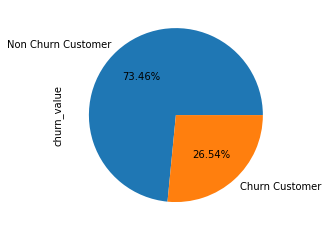

In [29]:
df['churn_value'].value_counts(normalize=True).plot(kind = 'pie', labels = ['Non Churn Customer', 'Churn Customer'], autopct = '%1.2f%%')

In [30]:
from imblearn.under_sampling import RandomUnderSampler

In [31]:
y.value_counts()

0    5174
1    1869
Name: churn_value, dtype: int64

In [32]:
x_train.shape

(5282, 32)

In [33]:
y_train.value_counts()

0    3880
1    1402
Name: churn_value, dtype: int64

In [37]:
rndm_us = RandomUnderSampler(sampling_strategy=1)
x_samples, y_samples = rndm_us.fit_resample(x,y)
print(y.value_counts())
print(y_samples.value_counts())

0    5174
1    1869
Name: churn_value, dtype: int64
0    1869
1    1869
Name: churn_value, dtype: int64


In [35]:
rndm_us = RandomUnderSampler(sampling_strategy=0.7)
x_samples, y_samples = rndm_us.fit_resample(x,y)
print(y.value_counts())
print(y_samples.value_counts())

0    5174
1    1869
Name: churn_value, dtype: int64
0    2670
1    1869
Name: churn_value, dtype: int64


In [36]:
x_train, x_test, y_train, y_test = train_test_split(x_samples,y_samples, test_size=0.25, random_state=12, stratify=y_samples)
logistic_clf = LogisticRegression()
logistic_clf.fit(x_train, y_train)

LogisticRegression()

In [39]:
print('*******************Test Data Evaluation***********************')
evaluate_model('Test Data Evaluation', logistic_clf, x_test, y_test)
print('*******************Train Data Evaluation***********************')
evaluate_model('Train Data Evaluation', logistic_clf, x_train, y_train)

*******************Test Data Evaluation***********************
Accuracy Score : 0.8995594713656387
************************************************************
Confusion Matrix : 
 [[597  71]
 [ 43 424]]
************************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.89      0.91       668
           1       0.86      0.91      0.88       467

    accuracy                           0.90      1135
   macro avg       0.89      0.90      0.90      1135
weighted avg       0.90      0.90      0.90      1135

************************************************************
*******************Train Data Evaluation***********************
Accuracy Score : 0.895710928319624
************************************************************
Confusion Matrix : 
 [[1814  188]
 [ 167 1235]]
************************************************************
Classification Report : 
               precision   

# Oversampling

In [40]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTETomek

In [41]:
rndm_os = RandomOverSampler(sampling_strategy=0.8)
x_train_ros, y_train_ros = rndm_os.fit_resample(x_train,y_train)
print(y_train.value_counts())
print(y_train_ros.value_counts())

0    2002
1    1402
Name: churn_value, dtype: int64
0    2002
1    1601
Name: churn_value, dtype: int64


In [43]:
logistic_clf = LogisticRegression()
logistic_clf.fit(x_train_ros, y_train_ros)
print('*******************Test Data Evaluation***********************')
evaluate_model('Test Data Evaluation', logistic_clf, x_test, y_test)
print('*******************Train Data Evaluation***********************')
evaluate_model('Train Data Evaluation', logistic_clf, x_train_ros, y_train_ros)

*******************Test Data Evaluation***********************
Accuracy Score : 0.8960352422907489
************************************************************
Confusion Matrix : 
 [[589  79]
 [ 39 428]]
************************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.88      0.91       668
           1       0.84      0.92      0.88       467

    accuracy                           0.90      1135
   macro avg       0.89      0.90      0.89      1135
weighted avg       0.90      0.90      0.90      1135

************************************************************
*******************Train Data Evaluation***********************
Accuracy Score : 0.8981404385234527
************************************************************
Confusion Matrix : 
 [[1802  200]
 [ 167 1434]]
************************************************************
Classification Report : 
               precision  

## SMOTE

In [46]:
smote_os = SMOTE(sampling_strategy=0.85)
x_train_sm, y_train_sm = smote_os.fit_resample(x_train,y_train)
print(y_train.value_counts())
print(y_train_sm.value_counts())

logistic_clf = LogisticRegression()
logistic_clf.fit(x_train_sm, y_train_sm)
print('*******************Test Data Evaluation***********************')
evaluate_model('Test Data Evaluation', logistic_clf, x_test, y_test)
print('*******************Train Data Evaluation***********************')
evaluate_model('Train Data Evaluation', logistic_clf, x_train_sm, y_train_sm)

0    2002
1    1402
Name: churn_value, dtype: int64
0    2002
1    1701
Name: churn_value, dtype: int64
*******************Test Data Evaluation***********************
Accuracy Score : 0.8942731277533039
************************************************************
Confusion Matrix : 
 [[587  81]
 [ 39 428]]
************************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.88      0.91       668
           1       0.84      0.92      0.88       467

    accuracy                           0.89      1135
   macro avg       0.89      0.90      0.89      1135
weighted avg       0.90      0.89      0.89      1135

************************************************************
*******************Train Data Evaluation***********************
Accuracy Score : 0.9014312719416689
************************************************************
Confusion Matrix : 
 [[1797  205]
 [ 160 1541]]
********

## Oversampling + Undersampling

In [47]:
rndm_us = RandomUnderSampler(sampling_strategy=0.7)
x_train_rus, y_train_rus = rndm_us.fit_resample(x_train,y_train)
print(y_train.value_counts())
print(y_train_rus.value_counts())

rndm_os = RandomOverSampler(sampling_strategy=0.8)
x_train_samples, y_train_samples = rndm_os.fit_resample(x_train_rus,y_train_rus)
print(y_train.value_counts())
print(y_train_samples.value_counts())

logistic_clf = LogisticRegression()
logistic_clf.fit(x_train_samples, y_train_samples)
print('*******************Test Data Evaluation***********************')
evaluate_model('Test Data Evaluation', logistic_clf, x_test, y_test)
print('*******************Train Data Evaluation***********************')
evaluate_model('Train Data Evaluation', logistic_clf, x_train_samples, y_train_samples)

0    2002
1    1402
Name: churn_value, dtype: int64
0    2002
1    1402
Name: churn_value, dtype: int64
0    2002
1    1402
Name: churn_value, dtype: int64
0    2002
1    1601
Name: churn_value, dtype: int64
*******************Test Data Evaluation***********************
Accuracy Score : 0.8951541850220265
************************************************************
Confusion Matrix : 
 [[589  79]
 [ 40 427]]
************************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.88      0.91       668
           1       0.84      0.91      0.88       467

    accuracy                           0.90      1135
   macro avg       0.89      0.90      0.89      1135
weighted avg       0.90      0.90      0.90      1135

************************************************************
*******************Train Data Evaluation***********************
Accuracy Score : 0.8970302525673051
*************

# Decision Tree 

In [49]:
X = df.drop(['churn_value'],axis=1)
Y = df['churn_value']

In [50]:
X=X.apply(pd.to_numeric,errors='coerce')
Y=Y.apply(pd.to_numeric,errors='coerce')

X.fillna(0,inplace=True)
Y.fillna(0,inplace=True)

In [53]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=2,stratify=Y)
dt_model = DecisionTreeClassifier(criterion='gini',max_depth=6,min_samples_leaf=8,random_state=25)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=25)

In [55]:
print('*******************Test Data Evaluation***********************')
evaluate_model('Test Data Evaluation', dt_model, x_test, y_test)
print('*******************Train Data Evaluation***********************')
evaluate_model('Train Data Evaluation', dt_model, x_train, y_train)

*******************Test Data Evaluation***********************
Accuracy Score : 0.9389638041163946
************************************************************
Confusion Matrix : 
 [[984  51]
 [ 35 339]]
************************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      1035
           1       0.87      0.91      0.89       374

    accuracy                           0.94      1409
   macro avg       0.92      0.93      0.92      1409
weighted avg       0.94      0.94      0.94      1409

************************************************************
*******************Train Data Evaluation***********************
Accuracy Score : 0.931487397941072
************************************************************
Confusion Matrix : 
 [[3924  215]
 [ 171 1324]]
************************************************************
Classification Report : 
               precision   

In [56]:
dt_clf_pruning = DecisionTreeClassifier(random_state=20)
dt_clf_pruning.fit(x_train,y_train)

DecisionTreeClassifier(random_state=20)

## Pruning

In [57]:
result = dt_clf_pruning.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas = result['ccp_alphas']
ccp_alphas

array([0.00000000e+00, 1.33120341e-04, 1.39436561e-04, 1.57772256e-04,
       1.59744409e-04, 1.59744409e-04, 1.61357989e-04, 1.61357989e-04,
       1.62702639e-04, 1.63840419e-04, 1.67052977e-04, 1.67351286e-04,
       1.69041703e-04, 1.69425888e-04, 1.70394036e-04, 1.71265936e-04,
       1.71373312e-04, 1.71768182e-04, 1.72696658e-04, 1.73273656e-04,
       1.74763114e-04, 1.77769485e-04, 2.02850043e-04, 2.12992545e-04,
       2.12992545e-04, 2.21867235e-04, 2.23687684e-04, 2.29197175e-04,
       2.36658384e-04, 2.36658384e-04, 2.36658384e-04, 2.36658384e-04,
       2.36658384e-04, 2.36658384e-04, 2.36658384e-04, 2.36658384e-04,
       2.36658384e-04, 2.36658384e-04, 2.39616613e-04, 2.52435609e-04,
       2.53697787e-04, 2.62144671e-04, 2.66240682e-04, 2.66240682e-04,
       2.66240682e-04, 2.66240682e-04, 2.66240682e-04, 2.66240682e-04,
       2.77382067e-04, 2.83990060e-04, 2.83990060e-04, 2.83990060e-04,
       2.83990060e-04, 2.86720734e-04, 2.95822980e-04, 2.95822980e-04,
      

In [58]:
train_acc_list = []
test_acc_list = []

for ccp_alpha_i in ccp_alphas:
    dt_clf_pruning = DecisionTreeClassifier(random_state=20, ccp_alpha=ccp_alpha_i)
    dt_clf_pruning.fit(x_train,y_train)
    
    train_acc = dt_clf_pruning.score(x_train, y_train)
    train_acc_list.append(train_acc)
    
    test_acc = dt_clf_pruning.score(x_test, y_test)
    test_acc_list.append(test_acc)
    
    print(ccp_alpha_i, '>>', train_acc, '>>', test_acc)

0.0 >> 1.0 >> 0.915542938254081
0.00013312034078807243 >> 0.9998225062122825 >> 0.915542938254081
0.00013943656116180086 >> 0.9994675186368477 >> 0.915542938254081
0.00015777225574882656 >> 0.9992900248491303 >> 0.915542938254081
0.00015974440894568693 >> 0.9989350372736954 >> 0.915542938254081
0.00015974440894568693 >> 0.9989350372736954 >> 0.915542938254081
0.00016135798883402719 >> 0.9985800496982605 >> 0.9162526614620298
0.00016135798883402719 >> 0.9985800496982605 >> 0.9162526614620298
0.0001627026387409774 >> 0.9984025559105432 >> 0.9162526614620298
0.0001638404194314737 >> 0.9982250621228257 >> 0.9176721078779276
0.00016705297667522816 >> 0.9978700745473909 >> 0.9176721078779276
0.0001673512855621481 >> 0.997515086971956 >> 0.9176721078779276
0.0001690417025880285 >> 0.9973375931842385 >> 0.9176721078779276
0.00016942588827572862 >> 0.9971600993965212 >> 0.9176721078779276
0.00017039403620873264 >> 0.9969826056088037 >> 0.9176721078779276
0.00017126593551681837 >> 0.996627618033

0.0008009976061094273 >> 0.9352147674831381 >> 0.9375443577004968
0.0008054339946841345 >> 0.934327298544551 >> 0.9382540809084458
0.0008120201973149457 >> 0.934327298544551 >> 0.9382540809084458
0.0008512384413268612 >> 0.934327298544551 >> 0.9382540809084458
0.0009026145169540988 >> 0.9334398296059638 >> 0.9382540809084458
0.0009149243643326576 >> 0.931487397941072 >> 0.9389638041163946
0.0010579405824763116 >> 0.931487397941072 >> 0.9389638041163946
0.0017107540990314272 >> 0.9275825346112886 >> 0.9339957416607523
0.0017737211549264612 >> 0.9247426340078098 >> 0.9339957416607523
0.0040391599249695875 >> 0.919062832800852 >> 0.9268985095812633
0.0044692376987243015 >> 0.919062832800852 >> 0.9268985095812633
0.007167351962926685 >> 0.9006034788782392 >> 0.9127040454222853
0.030028247583915174 >> 0.8828541001064962 >> 0.8871540099361249
0.054895115553639545 >> 0.8828541001064962 >> 0.8871540099361249
0.18781180592704086 >> 0.7346467873624423 >> 0.7345635202271115


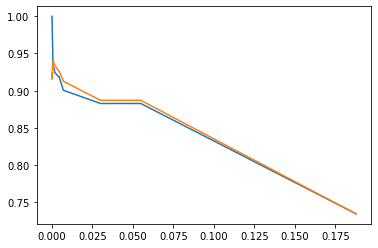

In [59]:
plt.plot(ccp_alphas, train_acc_list, label = 'Train Data Accuracy')
plt.plot(ccp_alphas, test_acc_list, label = 'Test Data Accuracy')

## UnderSampling

In [60]:
Y.value_counts()

0    5174
1    1869
Name: churn_value, dtype: int64

In [61]:
y_train.value_counts()

0    4139
1    1495
Name: churn_value, dtype: int64

In [62]:
rndm_us = RandomUnderSampler(sampling_strategy=1)
x_samples, y_samples = rndm_us.fit_resample(X,Y)
print(Y.value_counts())
print(y_samples.value_counts())

0    5174
1    1869
Name: churn_value, dtype: int64
0    1869
1    1869
Name: churn_value, dtype: int64


In [63]:
rndm_us = RandomUnderSampler(sampling_strategy=0.7)
x_samples, y_samples = rndm_us.fit_resample(X,Y)
print(Y.value_counts())
print(y_samples.value_counts())

0    5174
1    1869
Name: churn_value, dtype: int64
0    2670
1    1869
Name: churn_value, dtype: int64


In [64]:
x_train, x_test, y_train, y_test = train_test_split(x_samples,y_samples, test_size=0.25, random_state=12, stratify=y_samples)
decision_clf = DecisionTreeClassifier()
decision_clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [66]:
print('*******************Test Data Evaluation***********************')
evaluate_model('Train Data Evaluation', decision_clf, x_train, y_train)
print('*******************Train Data Evaluation***********************')
evaluate_model('Test Data Evaluation', decision_clf, x_test, y_test)

*******************Test Data Evaluation***********************
Accuracy Score : 1.0
************************************************************
Confusion Matrix : 
 [[2002    0]
 [   0 1402]]
************************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2002
           1       1.00      1.00      1.00      1402

    accuracy                           1.00      3404
   macro avg       1.00      1.00      1.00      3404
weighted avg       1.00      1.00      1.00      3404

************************************************************
*******************Train Data Evaluation***********************
Accuracy Score : 0.8986784140969163
************************************************************
Confusion Matrix : 
 [[608  60]
 [ 55 412]]
************************************************************
Classification Report : 
               precision    recall  f1-sc

In [67]:
random_us = RandomUnderSampler(sampling_strategy=0.7)
x_train_rus, y_train_rus = random_us.fit_resample(x_train,y_train)
print(y_train.value_counts())
print(y_train_rus.value_counts())

0    2002
1    1402
Name: churn_value, dtype: int64
0    2002
1    1402
Name: churn_value, dtype: int64


In [69]:
decision_clf_model = DecisionTreeClassifier()
decision_clf_model.fit(x_train_rus, y_train_rus)
print('*******************Test Data Evaluation***********************')
evaluate_model('Test Data Evaluation', decision_clf_model, x_test, y_test)
print('*******************Train Data Evaluation***********************')
evaluate_model('Train Data Evaluation', decision_clf_model, x_train_rus, y_train_rus)

*******************Test Data Evaluation***********************
Accuracy Score : 0.9039647577092511
************************************************************
Confusion Matrix : 
 [[611  57]
 [ 52 415]]
************************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.91      0.92       668
           1       0.88      0.89      0.88       467

    accuracy                           0.90      1135
   macro avg       0.90      0.90      0.90      1135
weighted avg       0.90      0.90      0.90      1135

************************************************************
*******************Train Data Evaluation***********************
Accuracy Score : 1.0
************************************************************
Confusion Matrix : 
 [[2002    0]
 [   0 1402]]
************************************************************
Classification Report : 
               precision    recall  f1-sc

## Oversampling 

In [72]:
random_os = RandomOverSampler(sampling_strategy=0.85)
x_train_ros, y_train_ros = random_os.fit_resample(x_train,y_train)
print(y_train.value_counts())
print(y_train_ros.value_counts())

*******************Test Data Evaluation***********************
0    2002
1    1402
Name: churn_value, dtype: int64
*******************Train Data Evaluation***********************
0    2002
1    1701
Name: churn_value, dtype: int64


In [73]:
decision_clf = DecisionTreeClassifier()
decision_clf.fit(x_train_ros, y_train_ros)
print('*******************Test Data Evaluation***********************')
evaluate_model('Test Data Evaluation', decision_clf, x_test, y_test)
print('*******************Train Data Evaluation***********************')
evaluate_model('Train Data Evaluation', decision_clf,x_train_ros, y_train_ros)

*******************Test Data Evaluation***********************
Accuracy Score : 0.8995594713656387
************************************************************
Confusion Matrix : 
 [[607  61]
 [ 53 414]]
************************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.91      0.91       668
           1       0.87      0.89      0.88       467

    accuracy                           0.90      1135
   macro avg       0.90      0.90      0.90      1135
weighted avg       0.90      0.90      0.90      1135

************************************************************
*******************Train Data Evaluation***********************
Accuracy Score : 1.0
************************************************************
Confusion Matrix : 
 [[2002    0]
 [   0 1701]]
************************************************************
Classification Report : 
               precision    recall  f1-sc

## SMOTE

In [74]:
smote_os = SMOTE(sampling_strategy=0.85)
x_train_sm, y_train_sm = smote_os.fit_resample(x_train,y_train)
print(y_train.value_counts())
print(y_train_sm.value_counts())

decision_clf_sm = DecisionTreeClassifier()
decision_clf_sm.fit(x_train_sm, y_train_sm)
print('*******************Test Data Evaluation***********************')
evaluate_model('Test Data Evaluation', decision_clf_sm, x_test, y_test)
print('*******************Train Data Evaluation***********************')
evaluate_model('Train Data Evaluation', decision_clf_sm, x_train_sm, y_train_sm)

0    2002
1    1402
Name: churn_value, dtype: int64
0    2002
1    1701
Name: churn_value, dtype: int64
*******************Test Data Evaluation***********************
Accuracy Score : 0.9030837004405287
************************************************************
Confusion Matrix : 
 [[607  61]
 [ 49 418]]
************************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       668
           1       0.87      0.90      0.88       467

    accuracy                           0.90      1135
   macro avg       0.90      0.90      0.90      1135
weighted avg       0.90      0.90      0.90      1135

************************************************************
*******************Train Data Evaluation***********************
Accuracy Score : 1.0
************************************************************
Confusion Matrix : 
 [[2002    0]
 [   0 1701]]
***********************

## Oversampling + Undersampling

In [75]:
rndm_us = RandomUnderSampler(sampling_strategy=0.7)
x_train_rus, y_train_rus = rndm_us.fit_resample(x_train,y_train)
print(y_train.value_counts())
print(y_train_rus.value_counts())

rndm_os = RandomOverSampler(sampling_strategy=0.8)
x_train_samples, y_train_samples = rndm_os.fit_resample(x_train_rus, y_train_rus)
print(y_train.value_counts())
print(y_train_samples.value_counts())

decision_clf = DecisionTreeClassifier()
decision_clf.fit(x_train_samples, y_train_samples)
print('*******************Test Data Evaluation***********************')
evaluate_model('Test Data Evaluation', decision_clf, x_test, y_test)
print('*******************Train Data Evaluation***********************')
evaluate_model('Train Data Evaluation', decision_clf, x_train_samples, y_train_samples)

0    2002
1    1402
Name: churn_value, dtype: int64
0    2002
1    1402
Name: churn_value, dtype: int64
0    2002
1    1402
Name: churn_value, dtype: int64
0    2002
1    1601
Name: churn_value, dtype: int64
*******************Test Data Evaluation***********************
Accuracy Score : 0.9039647577092511
************************************************************
Confusion Matrix : 
 [[615  53]
 [ 56 411]]
************************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       668
           1       0.89      0.88      0.88       467

    accuracy                           0.90      1135
   macro avg       0.90      0.90      0.90      1135
weighted avg       0.90      0.90      0.90      1135

************************************************************
*******************Train Data Evaluation***********************
Accuracy Score : 1.0
****************************

## RandomForestClassifier

In [77]:
X = df.drop(['churn_value'],axis=1)
Y = df['churn_value']

In [78]:
X=X.apply(pd.to_numeric,errors='coerce')
Y=Y.apply(pd.to_numeric,errors='coerce')

X.fillna(0,inplace=True)
Y.fillna(0,inplace=True)

In [79]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.20, random_state=2,stratify=Y)

In [82]:
random_model = RandomForestClassifier(n_estimators=50,random_state=2)
random_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=2)

In [84]:
def evaluation(string, model, ind_var, act):
    print(string.center(50,'*'))
    
    pred = model.predict(ind_var)
    cnf_matrix = confusion_matrix(act, pred)
    print('Confusion Matrix :\n', cnf_matrix)
    
    accuracy = accuracy_score(act, pred)
    print('Accuracy :', accuracy)
    
    clf_report = classification_report(act,pred)
    print('Classification Report :\n', clf_report)
evaluation('Test Data Evaluation', random_model, x_test, y_test)
print('*#'*30)
evaluation('Train Data Evaluation', random_model, x_train, y_train)

***************Test Data Evaluation***************
Confusion Matrix :
 [[995  40]
 [ 58 316]]
Accuracy : 0.9304471256210078
Classification Report :
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      1035
           1       0.89      0.84      0.87       374

    accuracy                           0.93      1409
   macro avg       0.92      0.90      0.91      1409
weighted avg       0.93      0.93      0.93      1409

*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#
**************Train Data Evaluation***************
Confusion Matrix :
 [[4139    0]
 [   1 1494]]
Accuracy : 0.9998225062122825
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4139
           1       1.00      1.00      1.00      1495

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00     

## Hyperparameter Tunning 

In [91]:
rf_model = RandomForestClassifier(random_state=2,max_samples=0.75,
                                 bootstrap=True, oob_score=True, n_jobs=-1)

hyp = {'n_estimators':np.arange(20,100),
    'criterion':['gini','entropy'],
    'max_depth': np.arange(3,10),
    'min_samples_split':np.arange(5,15),
    'min_samples_leaf':np.arange(3,10),}

rscv_rf_model = RandomizedSearchCV(rf_model, hyp, cv = 3)
rscv_rf_model.fit(x_train,y_train)
rscv_rf_model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=9, max_samples=0.75,
                       min_samples_leaf=7, min_samples_split=7, n_estimators=46,
                       n_jobs=-1, oob_score=True, random_state=2)

In [94]:
rf_clf_model = RandomForestClassifier(criterion='entropy', max_depth=9, max_samples=0.75,
                       min_samples_leaf=7, min_samples_split=7, n_estimators=46,
                       n_jobs=-1, oob_score=True, random_state=2)
rf_clf_model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, max_samples=0.75,
                       min_samples_leaf=7, min_samples_split=7, n_estimators=46,
                       n_jobs=-1, oob_score=True, random_state=2)

In [95]:
evaluation('Test Data Evaluation', rf_clf_model, x_test, y_test)
print('*#'*30)
evaluation('Train Data Evaluation', rf_clf_model, x_train, y_train)

***************Test Data Evaluation***************
Confusion Matrix :
 [[989  46]
 [ 44 330]]
Accuracy : 0.936124911284599
Classification Report :
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1035
           1       0.88      0.88      0.88       374

    accuracy                           0.94      1409
   macro avg       0.92      0.92      0.92      1409
weighted avg       0.94      0.94      0.94      1409

*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#
**************Train Data Evaluation***************
Confusion Matrix :
 [[3990  149]
 [ 158 1337]]
Accuracy : 0.945509407170749
Classification Report :
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      4139
           1       0.90      0.89      0.90      1495

    accuracy                           0.95      5634
   macro avg       0.93      0.93      0.93      5634
weighted avg       0.95      0.95      0

## UnderSampling

In [97]:
random_model = RandomForestClassifier(criterion='entropy', max_depth=9, max_samples=0.75,
                       min_samples_leaf=7, min_samples_split=7, n_estimators=46,
                       n_jobs=-1, oob_score=True, random_state=2)
random_model.fit(x_train_rus, y_train_rus)
evaluation('Test Data Evaluation', random_model, x_test, y_test)
evaluation('Train Data Evaluation', random_model, x_train_rus, y_train_rus)

***************Test Data Evaluation***************
Confusion Matrix :
 [[958  77]
 [ 21 353]]
Accuracy : 0.9304471256210078
Classification Report :
               precision    recall  f1-score   support

           0       0.98      0.93      0.95      1035
           1       0.82      0.94      0.88       374

    accuracy                           0.93      1409
   macro avg       0.90      0.93      0.91      1409
weighted avg       0.94      0.93      0.93      1409

**************Train Data Evaluation***************
Confusion Matrix :
 [[2015  120]
 [  81 1414]]
Accuracy : 0.9446280991735537
Classification Report :
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      2135
           1       0.92      0.95      0.93      1495

    accuracy                           0.94      3630
   macro avg       0.94      0.94      0.94      3630
weighted avg       0.95      0.94      0.94      3630



## OverSampling

In [98]:
random_model = RandomForestClassifier(criterion='entropy', max_depth=9, max_samples=0.75,
                       min_samples_leaf=7, min_samples_split=7, n_estimators=46,
                       n_jobs=-1, oob_score=True, random_state=2)
random_model.fit(x_train_ros, y_train_ros)
evaluation('Test Data Evaluation', random_model, x_test, y_test)
evaluation('Train Data Evaluation', random_model, x_train_ros, y_train_ros)

***************Test Data Evaluation***************
Confusion Matrix :
 [[960  75]
 [ 10 364]]
Accuracy : 0.9396735273243435
Classification Report :
               precision    recall  f1-score   support

           0       0.99      0.93      0.96      1035
           1       0.83      0.97      0.90       374

    accuracy                           0.94      1409
   macro avg       0.91      0.95      0.93      1409
weighted avg       0.95      0.94      0.94      1409

**************Train Data Evaluation***************
Confusion Matrix :
 [[1858  144]
 [  68 1633]]
Accuracy : 0.9427491223332433
Classification Report :
               precision    recall  f1-score   support

           0       0.96      0.93      0.95      2002
           1       0.92      0.96      0.94      1701

    accuracy                           0.94      3703
   macro avg       0.94      0.94      0.94      3703
weighted avg       0.94      0.94      0.94      3703



## SMOTE

In [99]:
smote_os = SMOTE(sampling_strategy=0.85)
x_train_sm, y_train_sm = smote_os.fit_resample(x_train,y_train)
print(y_train.value_counts())
print(y_train_sm.value_counts())

random_clf_sm = RandomForestClassifier(criterion='entropy', max_depth=6, max_samples=0.75,
                       min_samples_leaf=6, min_samples_split=9, n_estimators=79,
                       n_jobs=-1, oob_score=True, random_state=2)
random_clf_sm.fit(x_train_sm, y_train_sm)
evaluation('Test Data Evaluation', random_clf_sm, x_test, y_test)
evaluation('Train Data Evaluation', random_clf_sm, x_train_sm, y_train_sm)

0    4139
1    1495
Name: churn_value, dtype: int64
0    4139
1    3518
Name: churn_value, dtype: int64
***************Test Data Evaluation***************
Confusion Matrix :
 [[962  73]
 [ 23 351]]
Accuracy : 0.9318665720369056
Classification Report :
               precision    recall  f1-score   support

           0       0.98      0.93      0.95      1035
           1       0.83      0.94      0.88       374

    accuracy                           0.93      1409
   macro avg       0.90      0.93      0.92      1409
weighted avg       0.94      0.93      0.93      1409

**************Train Data Evaluation***************
Confusion Matrix :
 [[3863  276]
 [ 135 3383]]
Accuracy : 0.9463236254407732
Classification Report :
               precision    recall  f1-score   support

           0       0.97      0.93      0.95      4139
           1       0.92      0.96      0.94      3518

    accuracy                           0.95      7657
   macro avg       0.95      0.95      0.95      

## SMOTEENN

In [102]:
smote_os = SMOTEENN(sampling_strategy=0.85)
x_train_sme, y_train_sme = smote_os.fit_resample(x_train,y_train)
print(y_train.value_counts())
print(y_train_sm.value_counts())

random_clf_sm = RandomForestClassifier(criterion='entropy', max_depth=6, max_samples=0.75,
                       min_samples_leaf=6, min_samples_split=9, n_estimators=79,
                       n_jobs=-1, oob_score=True, random_state=2)
random_clf_sm.fit(x_train_sme, y_train_sme)
evaluation('Test Data Evaluation', random_clf_sm, x_test, y_test)
evaluation('Train Data Evaluation', random_clf_sm, x_train_sme, y_train_sme)

0    4139
1    1495
Name: churn_value, dtype: int64
1    1794
0    1735
Name: churn_value, dtype: int64
***************Test Data Evaluation***************
Confusion Matrix :
 [[964  71]
 [ 23 351]]
Accuracy : 0.9332860184528035
Classification Report :
               precision    recall  f1-score   support

           0       0.98      0.93      0.95      1035
           1       0.83      0.94      0.88       374

    accuracy                           0.93      1409
   macro avg       0.90      0.93      0.92      1409
weighted avg       0.94      0.93      0.93      1409

**************Train Data Evaluation***************
Confusion Matrix :
 [[1655   81]
 [  49 1678]]
Accuracy : 0.9624602945423043
Classification Report :
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      1736
           1       0.95      0.97      0.96      1727

    accuracy                           0.96      3463
   macro avg       0.96      0.96      0.96      